<a href="https://colab.research.google.com/github/mwlodarzc/FaceAuthentification/blob/main/FaceAuthentification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Database setup

Download database and mount in specific directory

[FFHQ-drive](https://colab.research.google.com/drive/1dUK52wx4RK3USJDAfeU0g4mULUbABLho#scrollTo=a-ST2PZWb9Ci&line=1&uniqifier=1)

[FFHQ-github](https://github.com/NVlabs/ffhq-dataset/blob/master/download_ffhq.py)

Link [dataset](https://drive.google.com/drive/folders/1LC13mmB8tUXomLDb_wn642t-pTPCGwkY?usp=sharing) in drive for proper use.

In [2]:
import os
from google.colab import drive

drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/face-authentication')

Mounted at /content/drive


# Keras prep

In [9]:
import numpy as np
import random
import tensorflow as tf


from tensorflow import keras
from keras import utils

[Arguments](https://keras.io/api/data_loading/image/#image_dataset_from_directory-function)

In [46]:
directory = os.getcwd()

training_set, validation_set = utils.image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=['real', 'generated'],
    color_mode="rgb",
    batch_size=32,
    image_size=(1024, 1024),
    shuffle=True,
    seed=1,
    validation_split=0.3,
    subset='both',
    interpolation="bilinear",
    follow_links=True,
    crop_to_aspect_ratio=False,
)

Found 370000 files belonging to 2 classes.
Using 259000 files for training.
Using 111000 files for validation.


# Generowanie przykładów

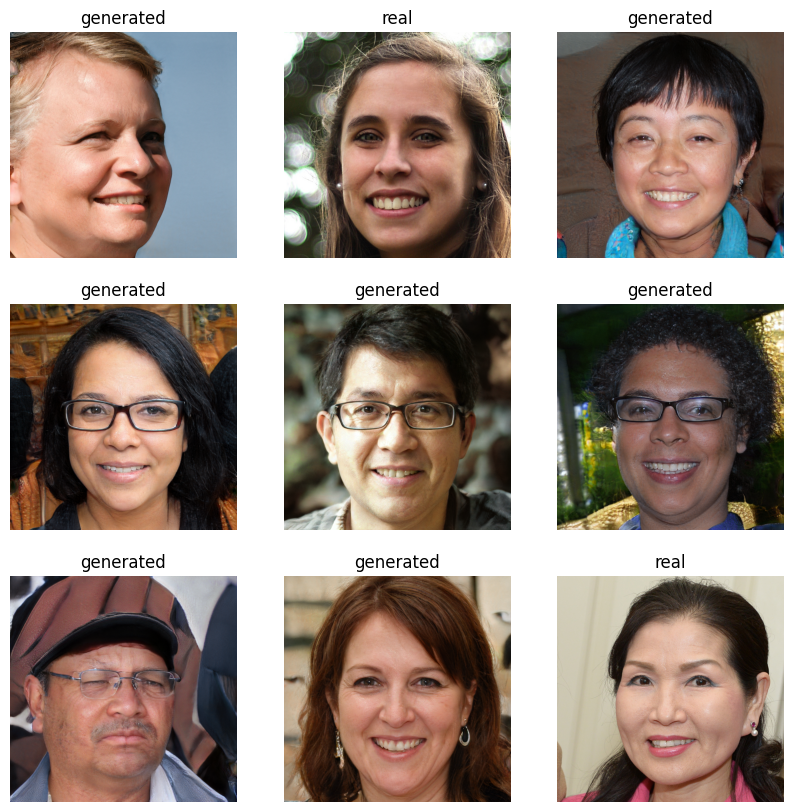

In [47]:
import matplotlib.pyplot as plt 

plt.figure('dataset examples',figsize=(10, 10))
for images, labels in validation_set.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(validation_set.class_names[int(labels[i])])
    plt.axis('off')


# Przykładowy model

In [22]:
from keras import models, layers

exModel = models.Sequential()
exModel.add(layers.Flatten(input_shape=(1024,1024)))  #*3?
exModel.add(layers.Dense(512, activation='relu'))      
exModel.add(layers.Dense(1, activation='softmax'))

In [23]:
exModel.compile(
    optimizer = 'rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)